In [177]:
# read data file
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [179]:
titanic=pd.read_csv("Titanic_train.csv")

In [181]:
titanic.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [183]:
titanic.describe(include="all")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


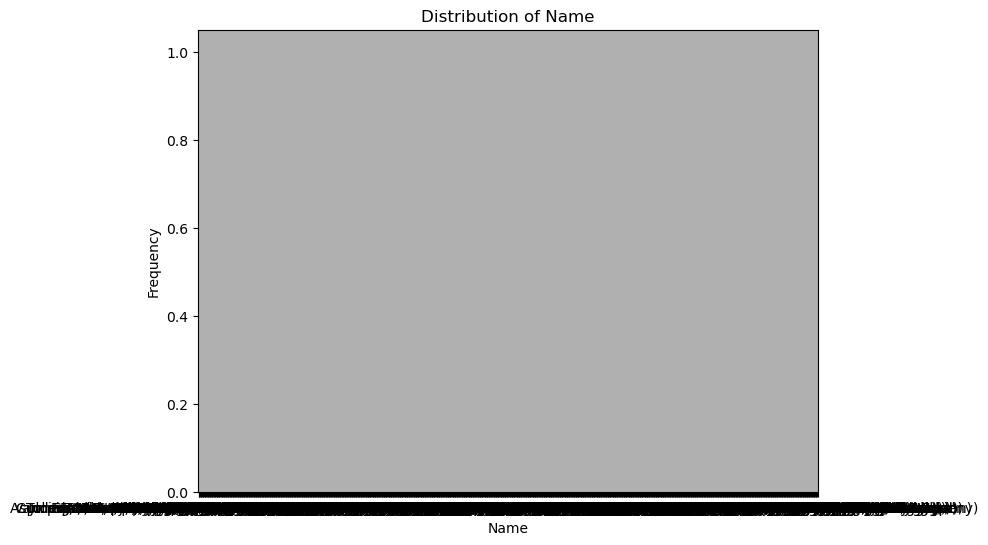

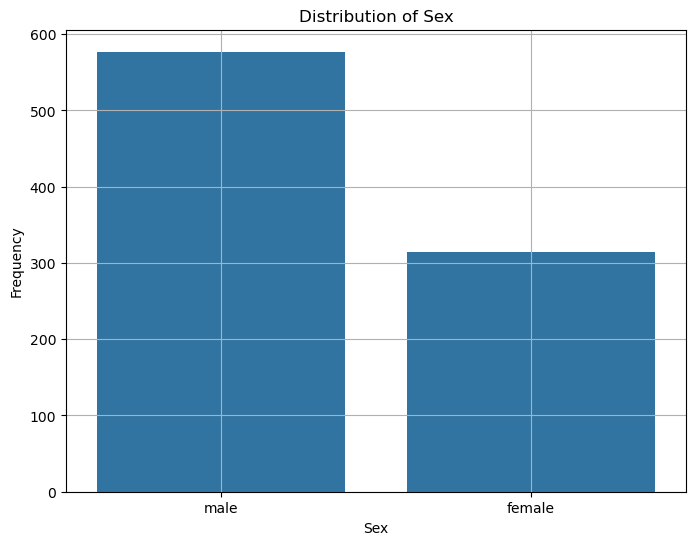

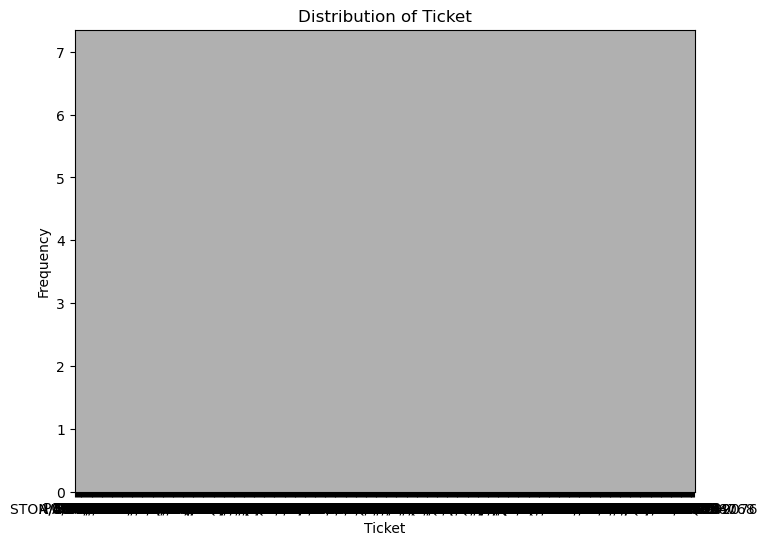

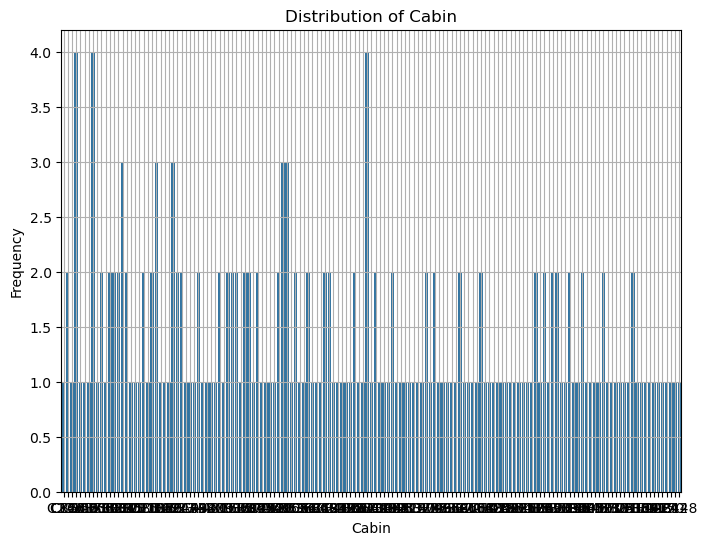

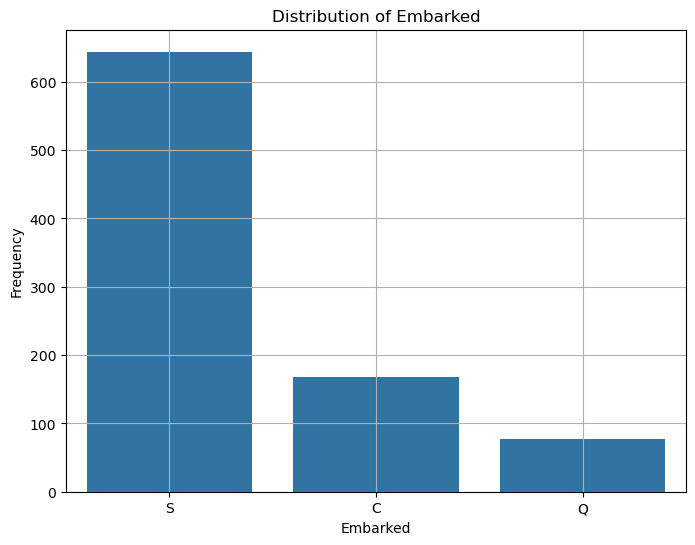

In [185]:
# Iterate over numeric columns in the 'titanic' DataFrame
for column in titanic.select_dtypes(include=['object']).columns:
        plt.figure(figsize=(8, 6))  # Adjust figure size as needed
        sns.countplot(x=titanic[column])
        plt.title(f'Distribution of {column}')
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.grid(True)
        plt.show()

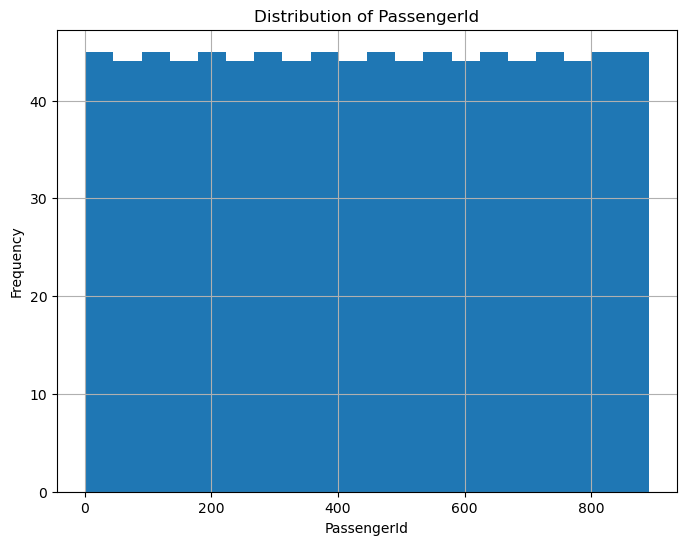

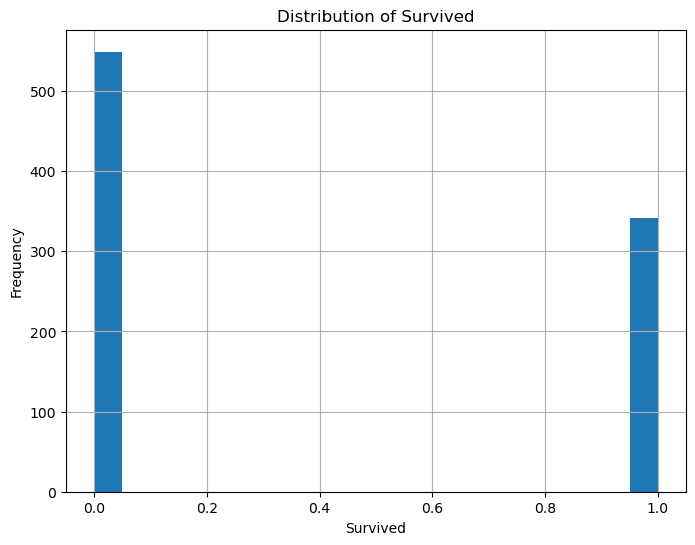

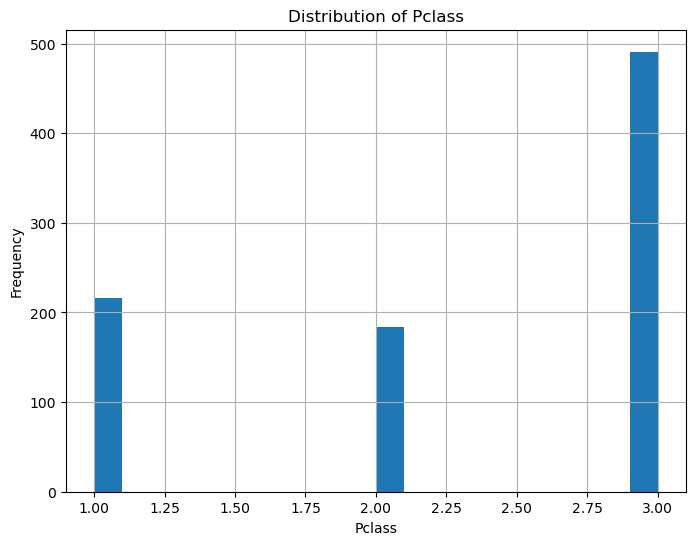

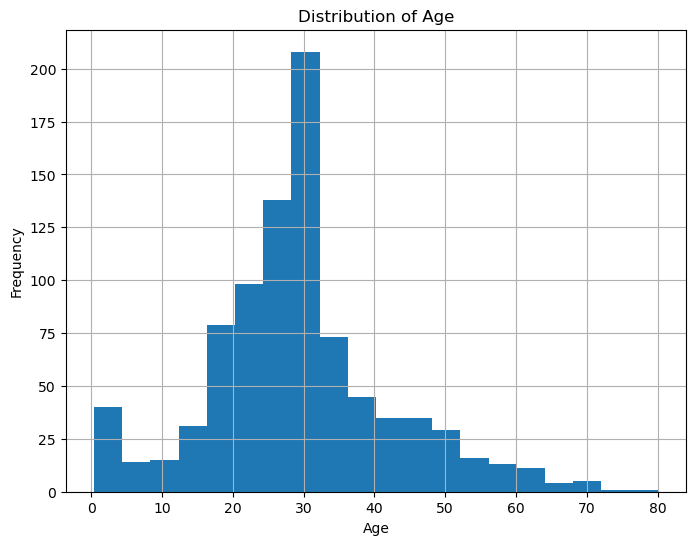

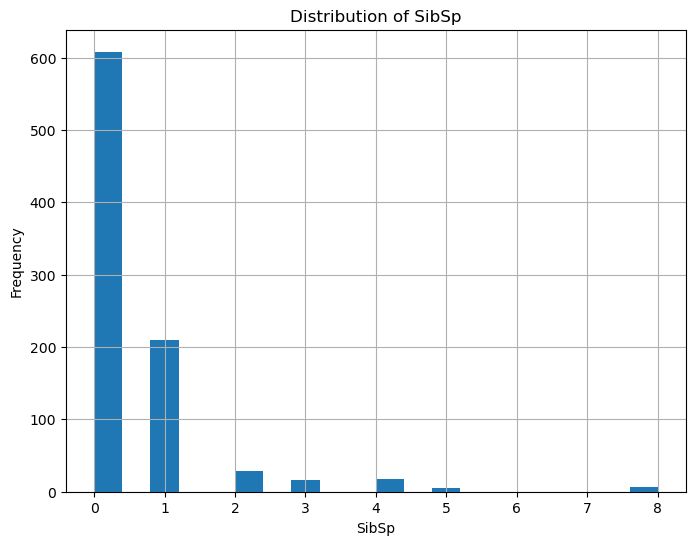

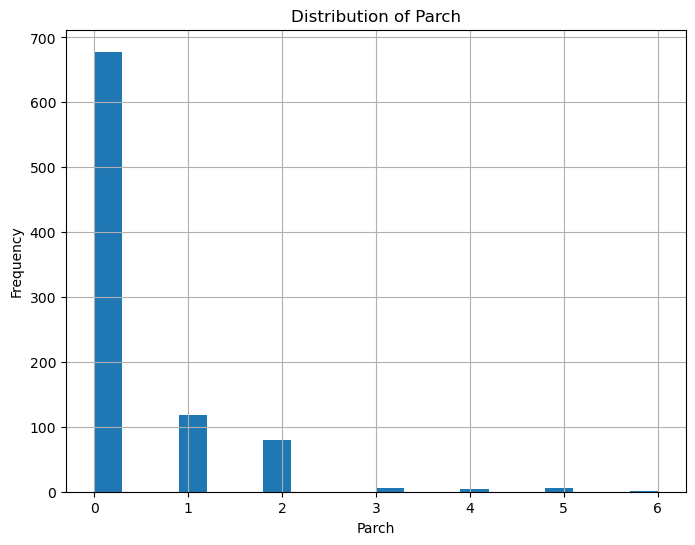

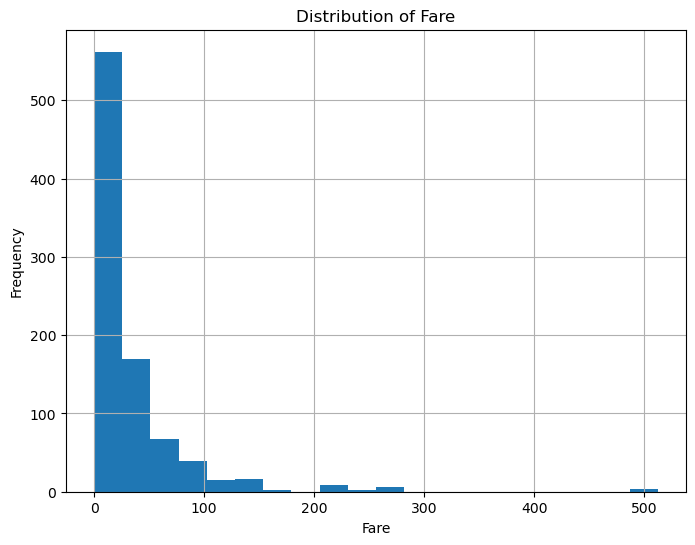

In [197]:
# Iterate over numeric columns in the 'titanic' DataFrame
for column in titanic.select_dtypes(include=['number']).columns:
        plt.figure(figsize=(8, 6))  # Adjust figure size as needed
        plt.hist(titanic[column], bins=20)  # Corrected reference to 'titanic'
        plt.title(f'Distribution of {column}')
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.grid(True)
        plt.show()

In [199]:
missing_values=titanic.isnull().sum()
print(missing_values)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [201]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


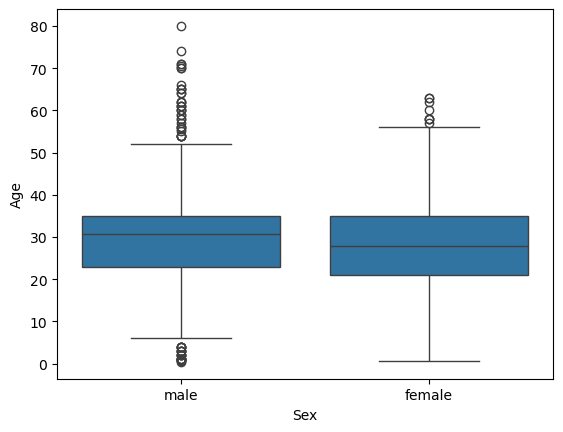

In [203]:
# First explore whether we should replace missing values of age based on sex. The analysis suggests we should.
sns.boxplot(x='Sex', y='Age', data=titanic)
plt.show()

In [205]:
#Replace missing values of age with mean by sex.
# Fill NaN values with the mean of their respective groups
titanic['Age'] = titanic['Age'].fillna(titanic.groupby('Sex')['Age'].transform('mean'))

In [207]:
# Those assigned a cabin were much more likely to survive than those that were not.
# Recode missing values
titanic['Cabinassign'] = np.where(pd.isna(titanic['Cabin']), 0, 1)
crosstab = pd.crosstab(titanic['Cabinassign'], titanic['Survived'], normalize='index')
print(crosstab)

Survived            0         1
Cabinassign                    
0            0.700146  0.299854
1            0.333333  0.666667


In [209]:
# Passengers who embarked from Cherbourg (C) were more likely to survive than those embraking from Queenstown (Q)
# or Southahmpton(S).
crosstab = pd.crosstab(titanic['Embarked'], titanic['Survived'], normalize='index')
print(crosstab)

Survived         0         1
Embarked                    
C         0.446429  0.553571
Q         0.610390  0.389610
S         0.663043  0.336957


In [211]:
# Passengers who embarked from Cherbourg (C) were more likely to survive than those embraking from Queenstown (Q)
# or Southahmpton(S). Recode into dummy variable to reflect Cherbourg with value of 1 and others with value of 0.

titanic['Cherbourg'] = titanic['Embarked'].replace({'C': 1, 'Q': 0, 'S': 0})

In [213]:
# Passengers in first were more likely to survive than those in second class. Passengers in second class were more 
# likely to survive than those in third class. 
table=pd.crosstab(titanic['Pclass'], titanic['Survived'], normalize='index')
print(table)

Survived         0         1
Pclass                      
1         0.370370  0.629630
2         0.527174  0.472826
3         0.757637  0.242363


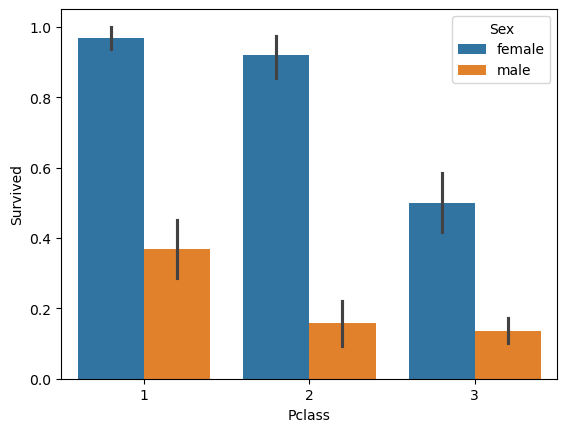

In [215]:
# Graph showing interaction between sex and class and survival. 
sns.barplot(x='Pclass', y='Survived', hue='Sex', data=titanic)
plt.show()


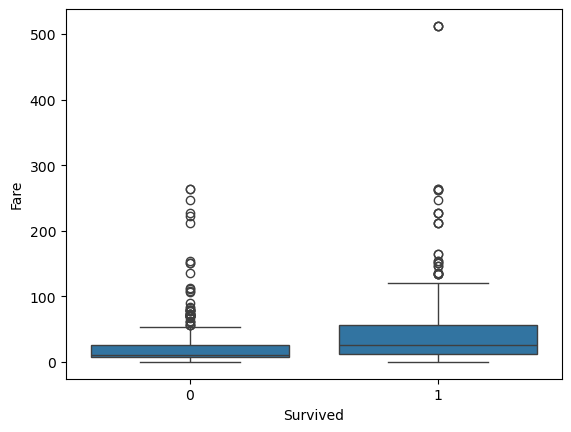

In [217]:
# Higher fares predicted greater survival.
sns.boxplot(x='Survived', y='Fare', data=titanic)
plt.show()

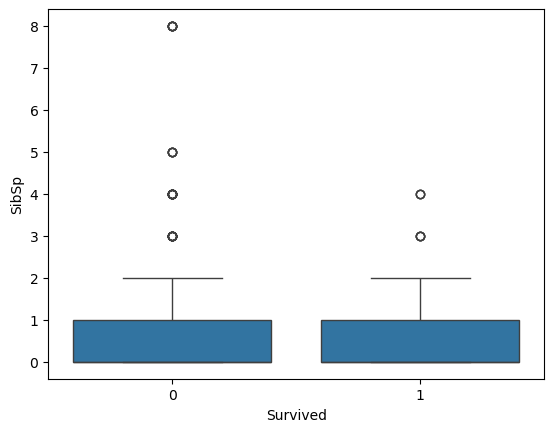

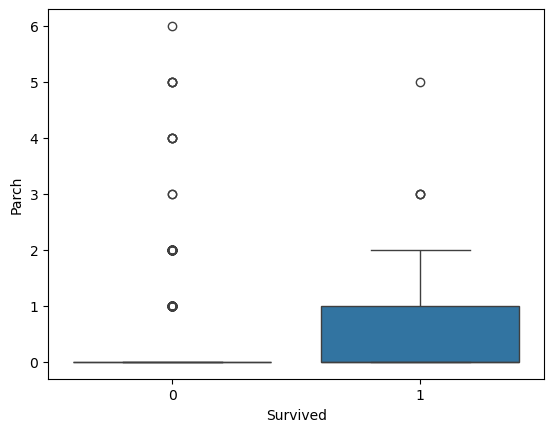

In [219]:
#Those who survived had fewer siblings and spouses but more parents / children. 
sns.boxplot(data=titanic, x='Survived', y='SibSp')
plt.show()
sns.boxplot(data=titanic, x='Survived', y='Parch')
plt.show()

In [221]:
# Is there an interaction effect between the variables of SibSp and Parch. The heat map suggests not.
table2=pd.crosstab(titanic['SibSp'], titanic['Parch'], values=titanic['Survived'], aggfunc='mean')
print(table2)

Parch         0         1         2         3    4         5    6
SibSp                                                            
0      0.303538  0.657895  0.724138  1.000000  0.0  0.000000  NaN
1      0.520325  0.596491  0.631579  0.333333  0.0  0.333333  0.0
2      0.250000  0.857143  0.500000  1.000000  NaN       NaN  NaN
3      1.000000  0.000000  0.285714       NaN  NaN       NaN  NaN
4           NaN  0.000000  0.333333       NaN  NaN       NaN  NaN
5           NaN       NaN  0.000000       NaN  NaN       NaN  NaN
8           NaN       NaN  0.000000       NaN  NaN       NaN  NaN


<Axes: xlabel='Parch', ylabel='SibSp'>

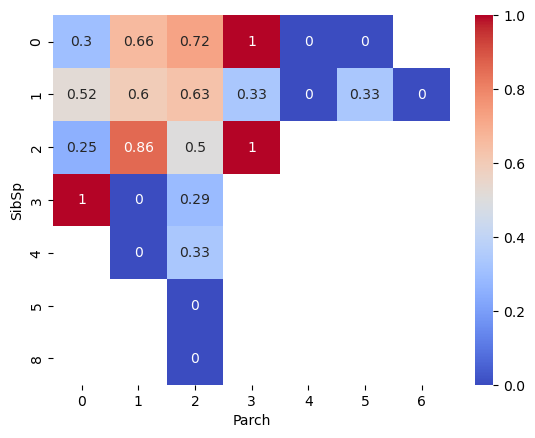

In [223]:
sns.heatmap(table2, cmap='coolwarm', annot=True)

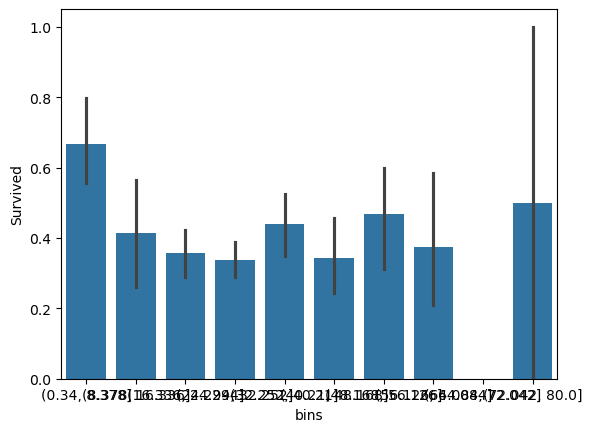

In [225]:
#Examine relationship between age and surviving.
# Create bins using pd.cut
titanic['bins'] = pd.cut(titanic['Age'], bins=10)

# Plot the bar chart
sns.barplot(x='bins', y='Survived', data=titanic, estimator='mean')
plt.show()

In [227]:
# It looks like the very young and very old are more likely to survive but the highest category of age has only one case.
crosstab = pd.crosstab(titanic['bins'], titanic['Survived'])
print(crosstab)

Survived            0    1
bins                      
(0.34, 8.378]      18   36
(8.378, 16.336]    27   19
(16.336, 24.294]  114   63
(24.294, 32.252]  229  117
(32.252, 40.21]    66   52
(40.21, 48.168]    46   24
(48.168, 56.126]   24   21
(56.126, 64.084]   15    9
(64.084, 72.042]    9    0
(72.042, 80.0]      1    1


In [229]:
crosstab = pd.crosstab(titanic['bins'], titanic['Survived'], normalize='index')
print(crosstab)

Survived                 0         1
bins                                
(0.34, 8.378]     0.333333  0.666667
(8.378, 16.336]   0.586957  0.413043
(16.336, 24.294]  0.644068  0.355932
(24.294, 32.252]  0.661850  0.338150
(32.252, 40.21]   0.559322  0.440678
(40.21, 48.168]   0.657143  0.342857
(48.168, 56.126]  0.533333  0.466667
(56.126, 64.084]  0.625000  0.375000
(64.084, 72.042]  1.000000  0.000000
(72.042, 80.0]    0.500000  0.500000


In [231]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    int64   
 2   Pclass       891 non-null    int64   
 3   Name         891 non-null    object  
 4   Sex          891 non-null    object  
 5   Age          891 non-null    float64 
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Cabin        204 non-null    object  
 11  Embarked     889 non-null    object  
 12  Cabinassign  891 non-null    int32   
 13  Cherbourg    889 non-null    float64 
 14  bins         891 non-null    category
dtypes: category(1), float64(3), int32(1), int64(5), object(5)
memory usage: 95.4+ KB


In [233]:
# Specify the bin you want to recode as 1

def recode_variable(Age):
    if Age >= 0.34 and Age <= 8.378:
        return 1
    else:
        return 0

# Apply function to 'Age' column
titanic['child'] = titanic['Age'].apply(recode_variable)

titanic.head(10)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabinassign,Cherbourg,bins,child
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S,0,0.0,"(16.336, 24.294]",0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C,1,1.0,"(32.252, 40.21]",0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0.0,"(24.294, 32.252]",0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S,1,0.0,"(32.252, 40.21]",0
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S,0,0.0,"(32.252, 40.21]",0
5,6,0,3,"Moran, Mr. James",male,30.726645,0,0,330877,8.4583,NaN,Q,0,0.0,"(24.294, 32.252]",0
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,17463,51.8625,E46,S,1,0.0,"(48.168, 56.126]",0
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,349909,21.0750,NaN,S,0,0.0,"(0.34, 8.378]",1
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,0,2,347742,11.1333,NaN,S,0,0.0,"(24.294, 32.252]",0
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,237736,30.0708,NaN,C,0,1.0,"(8.378, 16.336]",0


In [235]:
titanic['Sex_numeric'] = titanic['Sex'].replace({'male': 0, 'female': 1})
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    int64   
 2   Pclass       891 non-null    int64   
 3   Name         891 non-null    object  
 4   Sex          891 non-null    object  
 5   Age          891 non-null    float64 
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Cabin        204 non-null    object  
 11  Embarked     889 non-null    object  
 12  Cabinassign  891 non-null    int32   
 13  Cherbourg    889 non-null    float64 
 14  bins         891 non-null    category
 15  child        891 non-null    int64   
 16  Sex_numeric  891 non-null    int64   
dtypes: category(1), float64(3), int32(1), int64(7), object(5)
memory usage: 1

In [237]:
titanic['ClassSex'] =  titanic['Sex'].astype(str) + '_' + titanic['Pclass'].astype(str)

# Step 2: Create dummy variables for the combined variable
dummies = pd.get_dummies(titanic['ClassSex'], prefix='ClassSex')

# Step 3: Combine the dummy variables back to the original DataFrame
titanic = pd.concat([titanic, dummies], axis=1)

titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   PassengerId        891 non-null    int64   
 1   Survived           891 non-null    int64   
 2   Pclass             891 non-null    int64   
 3   Name               891 non-null    object  
 4   Sex                891 non-null    object  
 5   Age                891 non-null    float64 
 6   SibSp              891 non-null    int64   
 7   Parch              891 non-null    int64   
 8   Ticket             891 non-null    object  
 9   Fare               891 non-null    float64 
 10  Cabin              204 non-null    object  
 11  Embarked           889 non-null    object  
 12  Cabinassign        891 non-null    int32   
 13  Cherbourg          889 non-null    float64 
 14  bins               891 non-null    category
 15  child              891 non-null    int64   
 16  Sex_nume

In [239]:
missing_values=titanic.isnull().sum()
print(missing_values)
titanic.info()

PassengerId            0
Survived               0
Pclass                 0
Name                   0
Sex                    0
Age                    0
SibSp                  0
Parch                  0
Ticket                 0
Fare                   0
Cabin                687
Embarked               2
Cabinassign            0
Cherbourg              2
bins                   0
child                  0
Sex_numeric            0
ClassSex               0
ClassSex_female_1      0
ClassSex_female_2      0
ClassSex_female_3      0
ClassSex_male_1        0
ClassSex_male_2        0
ClassSex_male_3        0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   PassengerId        891 non-null    int64   
 1   Survived           891 non-null    int64   
 2   Pclass             891 non-null    int64   
 3   Name               891 non-null 

In [241]:
titanic = titanic.dropna(subset=['Cherbourg'])

In [30]:
#The model should include the Survived, Pclass, Sex_code, Sibsp, Parch, Fare, Cabinassign_code, Cherbourg, child, 'ClassSex_5', ClassSex_6', 'ClassSex_8', 'ClassSex_9', 'ClassSex_11', 'ClassSex_12' 

In [243]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler

subset_df1 = titanic[['Survived', 'Pclass', 'Sex_numeric', 'Parch', 'Fare', 'Cabinassign', 'Cherbourg', 'child', 'ClassSex_female_1', 'ClassSex_female_2', 'ClassSex_female_3', 'ClassSex_male_1', 'ClassSex_male_2', 'ClassSex_male_3']]

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the data
scaled_data = scaler.fit_transform(subset_df1)

# Create a new DataFrame with the scaled data
scaled_df = pd.DataFrame(scaled_data, columns=['Survived', 'Pclass', 'Sex_numeric', 'Parch', 'Fare', 'Cabinassign', 'Cherbourg', 'child', 'ClassSex_female_1', 'ClassSex_female_2', 'ClassSex_female_3', 'ClassSex_male_1', 'ClassSex_male_2', 'ClassSex_male_3'])

X = scaled_df.drop('Survived', axis=1)  # Features
y = subset_df1['Survived']  # Target variable

X_train=X
y_train=y


In [245]:
titanic_test=pd.read_csv("test.csv")
titanic_test.head(10)

# Recode sex into integer variable
titanic_test['Sex_numeric'] = titanic_test['Sex'].replace({'male': 0, 'female': 1})

# Recode Cabin into Cabinassign
titanic_test['Cabinassign'] = np.where(pd.isna(titanic_test['Cabin']), 0, 1)

# Recode Embarked into Cherbourg
titanic_test['Cherbourg'] = titanic_test['Embarked'].replace({'C': 1, 'Q': 0, 'S': 0})

# Recode Age into child
titanic_test['Age'] = titanic_test['Age'].fillna(titanic_test.groupby('Sex')['Age'].transform('mean'))

def recode_variable(Age):
    if Age >= 0.34 and Age <= 8.378:
        return 1
    else:
        return 0

titanic_test['child'] = titanic_test['Age'].apply(recode_variable)

titanic_test['Fare'] = titanic_test['Fare'].fillna(titanic_test.groupby('Pclass')['Fare'].transform('mean'))

titanic_test = titanic_test.dropna(subset=['Cherbourg'])


titanic_test['ClassSex'] =  titanic_test['Sex'].astype(str) + '_' + titanic_test['Pclass'].astype(str)
dummies = pd.get_dummies(titanic_test['ClassSex'], prefix='ClassSex')
titanic_test = pd.concat([titanic_test, dummies], axis=1)


subset_test = titanic_test[['Pclass', 'Sex_numeric', 'Parch', 'Fare', 'Cabinassign', 'Cherbourg', 'child', 'ClassSex_female_1', 'ClassSex_female_2', 'ClassSex_female_3', 'ClassSex_male_1', 'ClassSex_male_2', 'ClassSex_male_3']]

# Standardize
scaler = StandardScaler()
standardized_data = scaler.fit_transform(subset_test)
X_test = pd.DataFrame(standardized_data, columns=['Pclass', 'Sex_numeric', 'Parch', 'Fare', 'Cabinassign', 'Cherbourg', 'child', 'ClassSex_female_1', 'ClassSex_female_2', 'ClassSex_female_3', 'ClassSex_male_1', 'ClassSex_male_2', 'ClassSex_male_3'])

X_test

missing_values=X_test.isnull().sum()
print(missing_values)


Pclass               0
Sex_numeric          0
Parch                0
Fare                 0
Cabinassign          0
Cherbourg            0
child                0
ClassSex_female_1    0
ClassSex_female_2    0
ClassSex_female_3    0
ClassSex_male_1      0
ClassSex_male_2      0
ClassSex_male_3      0
dtype: int64


In [245]:
titanic_test=pd.read_csv("test.csv")
titanic_test.head(10)

# Recode sex into integer variable
titanic_test['Sex_numeric'] = titanic_test['Sex'].replace({'male': 0, 'female': 1})

# Recode Cabin into Cabinassign
titanic_test['Cabinassign'] = np.where(pd.isna(titanic_test['Cabin']), 0, 1)

# Recode Embarked into Cherbourg
titanic_test['Cherbourg'] = titanic_test['Embarked'].replace({'C': 1, 'Q': 0, 'S': 0})

# Recode Age into child
titanic_test['Age'] = titanic_test['Age'].fillna(titanic_test.groupby('Sex')['Age'].transform('mean'))

def recode_variable(Age):
    if Age >= 0.34 and Age <= 8.378:
        return 1
    else:
        return 0

titanic_test['child'] = titanic_test['Age'].apply(recode_variable)

titanic_test['Fare'] = titanic_test['Fare'].fillna(titanic_test.groupby('Pclass')['Fare'].transform('mean'))

titanic_test = titanic_test.dropna(subset=['Cherbourg'])


titanic_test['ClassSex'] =  titanic_test['Sex'].astype(str) + '_' + titanic_test['Pclass'].astype(str)
dummies = pd.get_dummies(titanic_test['ClassSex'], prefix='ClassSex')
titanic_test = pd.concat([titanic_test, dummies], axis=1)


subset_test = titanic_test[['Pclass', 'Sex_numeric', 'Parch', 'Fare', 'Cabinassign', 'Cherbourg', 'child', 'ClassSex_female_1', 'ClassSex_female_2', 'ClassSex_female_3', 'ClassSex_male_1', 'ClassSex_male_2', 'ClassSex_male_3']]

# Standardize
scaler = StandardScaler()
standardized_data = scaler.fit_transform(subset_test)
X_test = pd.DataFrame(standardized_data, columns=['Pclass', 'Sex_numeric', 'Parch', 'Fare', 'Cabinassign', 'Cherbourg', 'child', 'ClassSex_female_1', 'ClassSex_female_2', 'ClassSex_female_3', 'ClassSex_male_1', 'ClassSex_male_2', 'ClassSex_male_3'])

X_test

missing_values=X_test.isnull().sum()
print(missing_values)


Pclass               0
Sex_numeric          0
Parch                0
Fare                 0
Cabinassign          0
Cherbourg            0
child                0
ClassSex_female_1    0
ClassSex_female_2    0
ClassSex_female_3    0
ClassSex_male_1      0
ClassSex_male_2      0
ClassSex_male_3      0
dtype: int64


In [247]:
# Running the logistic model without tuning parameters

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Ensure X_test is properly defined
y_pred = model.predict(X_test)

# Create submission file (fixing PassengerId reference)
submission = pd.DataFrame({'PassengerId': titanic_test['PassengerId'], 'Survived': y_pred})

# Save to CSV
submission.to_csv("submission.csv", index=False)
print("Submission file created successfully!")

#Kaggle competition score=Score: .76794

Submission file created successfully!


In [249]:
#Running the logistic model with tuning parameters

from sklearn.model_selection import GridSearchCV

model = LogisticRegression()

param_grid = {'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l2'], 'solver': ['lbfgs']}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy') 

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_model = LogisticRegression(**best_params)
print(best_model)

print("Best parameters:", best_params)


best_model.fit(X_train, y_train)

y_pred = best_model.predict(X_test)

# Create submission file (fixing PassengerId reference)
submission = pd.DataFrame({'PassengerId': titanic_test['PassengerId'], 'Survived': y_pred})

# Save to CSV
submission.to_csv("submission.csv", index=False)
print("Submission file created successfully!")

coefficients = best_model.coef_
print(coefficients)

intercept =best_model.intercept_
print(intercept)

#Kaggle score=.78229


LogisticRegression(C=0.01)
Best parameters: {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}
Submission file created successfully!
[[-0.19229717  0.43474432 -0.07239706  0.08870409  0.20688771  0.13164596
   0.23413788  0.30480325  0.35217048  0.04391312 -0.09811164 -0.17206888
  -0.24090154]]
[-0.54472983]


In [251]:
y_train.info()

<class 'pandas.core.series.Series'>
Index: 889 entries, 0 to 890
Series name: Survived
Non-Null Count  Dtype
--------------  -----
889 non-null    int64
dtypes: int64(1)
memory usage: 13.9 KB


In [253]:
#Using Random Forest Classifier without tuning paramters

from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100)  # Adjust 'n_estimators' (number of trees) as needed
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Create submission file (fixing PassengerId reference)
submission = pd.DataFrame({'PassengerId': titanic_test['PassengerId'], 'Survived': y_pred})
submission.to_csv("submission.csv", index=False)
print("Submission file created successfully!")

#Kaggle competition score=0.76076


Submission file created successfully!


In [169]:
# Using Random Forest Classifier with tuning parameters
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, train_test_split
import numpy as np

param_grid = {
    'n_estimators': [100, 200, 500, 1000],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Create a Random Forest Classifier
rf = RandomForestClassifier(random_state=42)

# Use RandomizedSearchCV for hyperparameter tuning
rf_random = RandomizedSearchCV(estimator=rf, param_distributions=param_grid, 
                              n_iter=10, cv=5, verbose=2, random_state=42, n_jobs=-1)
# Fit the random search model
rf_random.fit(X_train, y_train)

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_
print("Best parameters:", best_params)

y_pred = rf_random.predict(X_test)

# Create submission file (fixing PassengerId reference)
submission = pd.DataFrame({'PassengerId': titanic_test['PassengerId'], 'Survived': y_pred})
submission.to_csv("submission.csv", index=False)
print("Submission file created successfully!")

#Kaggle competition score=0.76794

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best parameters: {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}
Submission file created successfully!


In [170]:
# Create KNN classifier (e.g., for k=10 neighbors)
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

# Create submission file (fixing PassengerId reference)
submission = pd.DataFrame({'PassengerId': titanic_test['PassengerId'], 'Survived': y_pred})
submission.to_csv("submission.csv", index=False)
print("Submission file created successfully!")
#Kaggle competition score=0.77033 for k=3 nearest neighbors
#Kaggle competition score=0.77511 for k=5 nearest neighbors
#Kaggle competition score=0.76076 for k=10 nearest neighbors

Submission file created successfully!


In [39]:
from sklearn import datasets
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Define parameter grid for tuning
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 0.1, 1]
}

# Create SVM model
svm = SVC()

# Use GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(svm, param_grid, cv=3, scoring='accuracy')

# Fit the model with training data
grid_search.fit(X_train, y_train)

# Print best parameters
print("Best parameters:", grid_search.best_params_)

# Get the best model
best_svm = grid_search.best_estimator_

# Make predictions on the test set
y_pred = best_svm.predict(X_test)

# Create submission file (fixing PassengerId reference)
submission = pd.DataFrame({'PassengerId': titanic_test['PassengerId'], 'Survived': y_pred})
submission.to_csv("submission.csv", index=False)
print("Submission file created successfully!")

#Kaggle competition score=0.75358


Best parameters: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
Submission file created successfully!


In [40]:
from sklearn import datasets
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Create SVM model
svm_model = SVC(kernel='linear', C=1.0) 

svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)

# Create submission file (fixing PassengerId reference)
submission = pd.DataFrame({'PassengerId': titanic_test['PassengerId'], 'Survived': y_pred})
submission.to_csv("submission.csv", index=False)
print("Submission file created successfully!")

#Kaggle competition score=0.77272

Submission file created successfully!
